# **Laboratorio 3**
**Daniela Navas**

## **Task 1** - Preguntas Teóricas

**Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.**<br>

**1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.**<br>
El descenso de gradiente es un algoritmo fundamental en el aprendizaje automático utilizado para minimizar la función de costo en modelos. Existen tres variantes principales:<br>
- **Descenso de Gradiente:** Este algoritmo utiliza todo el conjunto de datos para calcular el gradiente en cada iteración. Actualiza los parámetros del modelo después de procesar todos los ejemplos del conjunto de entrenamiento. Tiene como **ventajas** que proporciona una estimación precisa del gradiente y converge a un mínimo estable. Y como **desventajas** que puede ser lento para grandes conjuntos de datos y requiere mucha memoria.
- **Descenso de Gradiente Estocástico:** Utiliza un ejemplo aleatorio del conjunto de datos en cada iteración para actualizar los parámetros. Tiene como **ventajas** ser rápido y eficiente computacionalmente y que ayuda a escapar de mínimos locales debido a su naturaleza ruidosa. Y como **desventajas** que las actualizaciones pueden ser ruidosas, lo que puede llevar a una convergencia errática.
- **Descenso de Gradiente por Mini Batches:** Divide el conjunto de datos en lotes pequeños (mini batches) y actualiza los parámetros después del cálculo del gradiente sobre cada mini lote. Tiene como **ventajas** se equilibra la estabilidad con la velocidad y reduce la variabilidad comparado con SGD mientras mantiene cierta eficiencia computacional. Y como **desventajas** que requiere ajuste fino del tamaño del mini lote.


**2. Compare y contraste técnicas de extracción de features (feature extraction)  y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.**<br>
**_Extracción de Features (Feature Extraction)_**<br>
Transforma los datos originales en un nuevo conjunto de features, generalmente de menor dimensión. Algunos **ejemplos** son PCA (Análisis de Componentes Principales), t-SNE, autoencoders. Tiene como **ventajas** que puede reducir la dimensionalidad y eliminar redundancias, mejora la interpretabilidad y la eficiencia del modelo. Y como **desventajas** que puede ser complejo y requerir un conocimiento profundo del dominio.
La transformación puede perder información relevante. Sus **escenarios apropiados** son cuando se trabaja con datos de alta dimensionalidad y en problemas donde la reducción de dimensionalidad es crucial para la eficiencia.

**_Selección de Features (Feature Selection)_**<br>
Selecciona un subconjunto de features relevantes del conjunto de datos original sin transformarlos. Algunos **ejemplos** son selección basada en la importancia de features, selección basada en correlación, métodos de selección secuencial. Tiene como **ventajas** que mantiene la interpretabilidad de los datos originales y puede mejorar el rendimiento del modelo al eliminar features irrelevantes o redundantes. Y como **desventajas** que puede no ser tan efectiva en la reducción de dimensionalidad como la extracción de features y requiere criterios claros para la selección. Sus **escenarios apropiados** son cuando se desea mantener la interpretabilidad de los datos originales y en problemas donde algunas features pueden ser irrelevantes o redundantes.

**3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.**<br>
Un perceptrón simple es una red neuronal artificial básica compuesta por una capa única que aprende mediante reglas simples sin utilizar backpropagation tradicionalmente asociada con redes neuronales profundas modernas.

Su **_arquitectura_** se basa en:
- **Entradas:** Son valores numéricos representando información inicial que alimentan al modelo.
- **Pesos:** Cada entrada tiene un peso asociado que refleja su importancia relativa durante la predicción final.
- **Umbral/Bias:** Un valor adicional utilizado junto con las entradas ponderadas antes aplicarse activaciones lineales o no lineales simples como paso umbral binario ("Heaviside").
- **Salida:** El resultado final basado en si superó cierto umbral determinado por combinaciones ponderadas más bias ajustados durante entrenamientos iterativos usando reglas heurísticas sencillas basándose diferencias observables entre predicciones esperadas versus reales obtenidas tras probar distintos pesos hasta converger hacia soluciones óptimas dentro limitantes impuestos tanto matemáticos cómo empíricamente validables según contexto específico problema abordado.

El **aprendizaje** ocurre mediante ajustes graduales basados directamente observando desviaciones sistemáticas entre salidas esperadas versus reales generando así retroalimentación positiva/negativa según sea necesario hasta lograr equilibrio deseable conforme criterios evaluativos definidos previamente. Los pesos se ajustan para minimizar el error entre la salida deseada y la salida predicha y por medio de iteración se repite para múltiples veces hasta que el error se minimice o se alcance un número máximo de iteraciones.

## **Task 2** -  Ejercicios Prácticos<br>
Use Python en Jupyter Notebook para resolver los siguientes problemas relacionados a los temas que se vieron en clase. Asegúrese de citar todas las fuentes que utilice.

### **Task 2.1** - Gradiente Descendiente Estocástico<br> 
Implemente el descenso de gradiente estocástico, el descenso de gradiente y el descenso de gradiente por mini batches para una función polinómica de grado 3. Luego, grafique la función aproximada por cada uno de los métodos solicitados y la distribución real de puntos. Para esto considere que: 
- El polinomio que debe usar es $ \mathbf{ 2x^3 - 3x^2 + 5x + 3} $  
- Considere el uso de *np.polyval*
- Considere el uso de *np.polyder* 
- Compare el tiempo de ejecución de cada uno de los métodos solicitados. De esto, mencione cuál método fue más rápido y por qué.  
- Compare el fitness de cada método solicitado (recuerde hacer una evaluación numérica y no sólo visual). De 
esto mencione cuál método lo hizo mejor y por qué

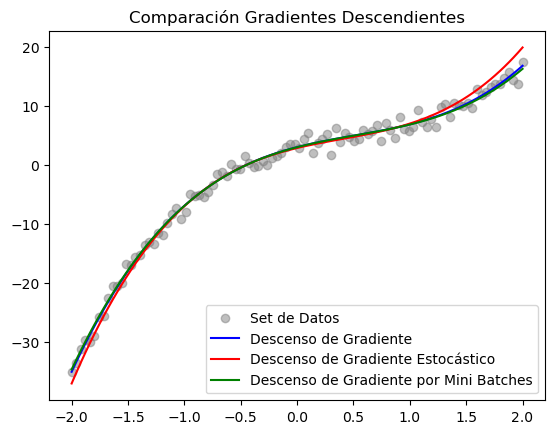

Descenso de Gradiente
Tiempo: 0.0170s, Fitness (MSE): 1.0196
______________________________________________
Descenso de Gradiente Estocástico
Tiempo: 1.0510s, Fitness (MSE): 1.9210
______________________________________________
Descenso de Gradiente por Mini Batches
Tiempo: 0.1002s, Fitness (MSE): 1.0459
______________________________________________


In [13]:
# LIBRERIAS 
import numpy as np
import matplotlib.pyplot as plt
import time

# Definir polinomio y derivada con polyder 
coeficientes = [2, -3, 5, 3]
derivada = np.polyder(coeficientes)

# Matriz de datos para prueba de las gradientes usando polyval
def generar_datos(n=100, ruido=1.0):
    x = np.linspace(-2, 2, n)
    y = np.polyval(coeficientes, x) + np.random.normal(0, ruido, n)
    return x, y

x, y = generar_datos()

# Función de costo - Error Cuadrático Medio
def costo(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

# Descenso de gradiente ------------------------------------------------------------------------------
def descenso_gradiente(x, y, lr, epochs):
    theta = np.random.randn(4)  # Coeficientes iniciales definimos de forma aleatoria
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        pred = x_pot @ theta  # Predicción con los coeficientes actuales
        gradiente = -2/n * x_pot.T @ (y - pred)  # Gradiente de la función de error
        theta -= lr * gradiente  # Actualización de coeficientes
        historial_costos.append(costo(y, pred))
    
    return theta, historial_costos

# Descenso de gradiente estocástico -------------------------------------------------------------------
def descenso_gradiente_estocastico(x, y, lr, epochs):
    theta = np.random.randn(4)
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        for i in range(n):
            xi = x_pot[i, :].reshape(1, -1)  # Un solo punto de datos
            yi = y[i]
            pred = xi @ theta  # Predicción
            gradiente = -2 * xi.T * (yi - pred)  # Gradiente solo con ese punto
            theta -= lr * gradiente.flatten()  # Actualización inmediata
        historial_costos.append(costo(y, x_pot @ theta))
    
    return theta, historial_costos

# Descenso de gradiente por mini batches ---------------------------------------------------------------
def descenso_gradiente_minibatch(x, y, lr, epochs, batch_size):
    theta = np.random.randn(4)
    n = len(x)
    x_pot = np.vstack([x**3, x**2, x, np.ones(n)]).T
    historial_costos = []
    
    for _ in range(epochs):
        indices = np.random.permutation(n) # Mezcla los datos
        x_shuffled, y_shuffled = x_pot[indices], y[indices]
        
        for i in range(0, n, batch_size):
            xb = x_shuffled[i:i+batch_size]  # Mini-lote de datos
            yb = y_shuffled[i:i+batch_size]
            pred = xb @ theta
            gradiente = -2/len(yb) * xb.T @ (yb - pred)  # Gradiente del mini-lote
            theta -= lr * gradiente  # Actualización de coeficientes
        historial_costos.append(costo(y, x_pot @ theta))
    
    return theta, historial_costos

# Definir Learning Rate (lr), épocas y tamaño de bache (Para gradiente por mini batches) 
lr = 0.01
epochs = 1000
batch_size=10

# Ejecución de métodos y toma de tiempo usando time()
start = time.time()
theta_gd, cost_gd = descenso_gradiente(x, y, lr, epochs)
time_gd = time.time() - start

start = time.time()
theta_sgd, cost_sgd = descenso_gradiente_estocastico(x, y, lr, epochs)
time_sgd = time.time() - start

start = time.time()
theta_mbg, cost_mbg = descenso_gradiente_minibatch(x, y, lr, epochs, batch_size)
time_mbg = time.time() - start

# Evaluación de Costo
fitness_gd = costo(y, np.polyval(theta_gd, x))
fitness_sgd = costo(y, np.polyval(theta_sgd, x))
fitness_mbg = costo(y, np.polyval(theta_mbg, x))

# Graficar los datos en comparación con los gradientes
plt.scatter(x, y, label='Set de Datos', color='gray', alpha=0.5)
x_fit = np.linspace(-2, 2, 100)
plt.plot(x_fit, np.polyval(theta_gd, x_fit), label='Descenso de Gradiente', color='blue')
plt.plot(x_fit, np.polyval(theta_sgd, x_fit), label='Descenso de Gradiente Estocástico', color='red')
plt.plot(x_fit, np.polyval(theta_mbg, x_fit), label='Descenso de Gradiente por Mini Batches', color='green')
plt.title('Comparación Gradientes Descendientes')
plt.legend()
plt.show()

# Mostrar resultados
print("Descenso de Gradiente")
print(f"Tiempo: {time_gd:.4f}s, Fitness (MSE): {fitness_gd:.4f}")
print("______________________________________________")
print("Descenso de Gradiente Estocástico")
print(f"Tiempo: {time_sgd:.4f}s, Fitness (MSE): {fitness_sgd:.4f}")
print("______________________________________________")
print("Descenso de Gradiente por Mini Batches")
print(f"Tiempo: {time_mbg:.4f}s, Fitness (MSE): {fitness_mbg:.4f}")
print("______________________________________________")


Después de realizar múltiples iteraciones, se determinó que el mejor modelo fue el **Descenso de Gradiente**, ya que obtuvo el tiempo de ejecución más bajo (0.0170s) y el fitness más alto, con un MSE de 1.0196, lo que indica un mejor ajuste del modelo a los datos reales. Esto se debe a que el Descenso de Gradiente actualiza los coeficientes del polinomio de manera más eficiente en comparación con el Descenso de Gradiente Estocástico y el Descenso de Gradiente por Mini Batches, usa todo el conjunto de datos en cada iteración, lo que reduce la variabilidad en los ajustes y permite una convergencia más rápida en este caso.